실전 기계학습 Lab #P02

소프트웨어융합학과 2018102111 서보민

1. [Exercise 4-1] 아래의 조건에서 loss를 w로 미분한 값을 구하시오.

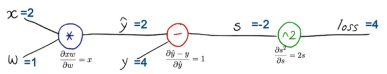

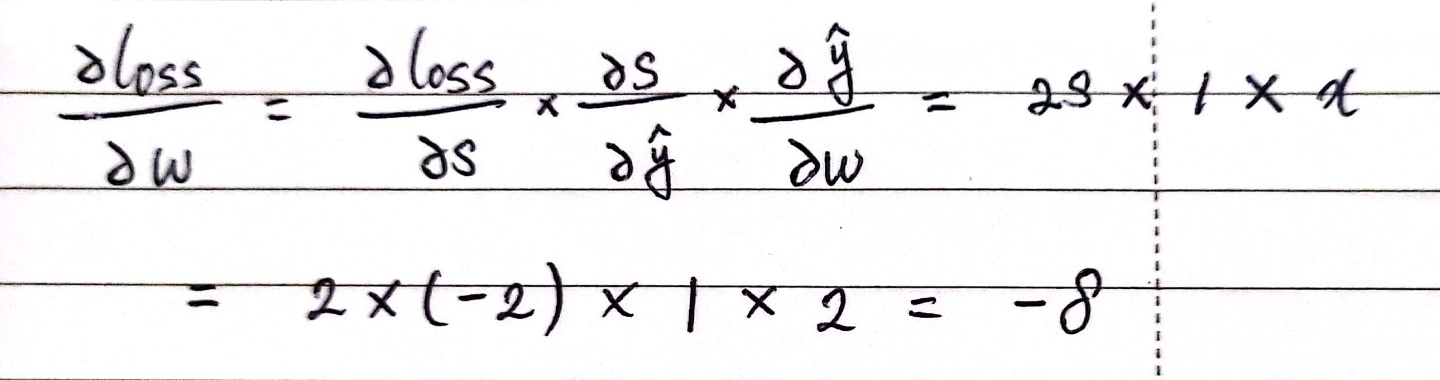

2. [Exercise 4-2] x = 1, y = 2, w = 1, b = 2 일때 loss를 w와 b로 미분한 값을 각각 구하시오.

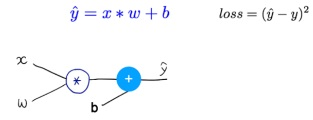

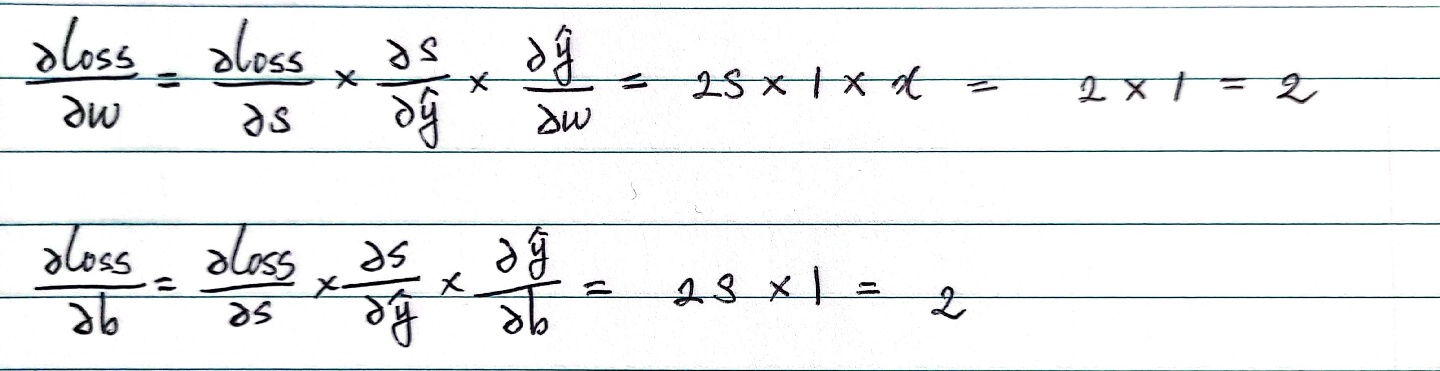

3. [Exercise 4-3] NumPy를 이용하여 아래 computation graph를 구현하고 back propagation을 통
해 loss를 w로 미분한 값을 출력하시오.

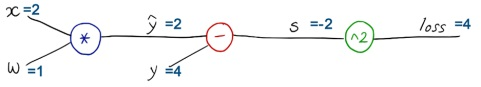

In [81]:
import numpy as np
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')
w = Symbol('w')

def partial_diff():
  y_hat = x * w
  dyhat_dw = np.gradient(y_hat, w)
  s = y_hat - y
  ds_dyhat = np.gradient(s, y_hat)
  loss = s**2
  dloss_ds = np.gradient(loss, s)
  dloss_dw = loss.diff(w)
  return dloss_dw
  
def set_val(equ, x_val, y_val, w_val):
  equ = equ.subs({x:x_val, y:y_val, w:w_val})
  return equ

ans = partial_diff()
ans = set_val(ans, 2, 4, 1)
print(ans)


-8


4. [Exercise 4-4] 아래 수식에 대해 loss를 w1, w2 각각의 변수에 대해 미분하시오.


1) 컴퓨터를 사용하지 말고, 손으로 미분을 수행하고 그 과정을 모두 적으시오


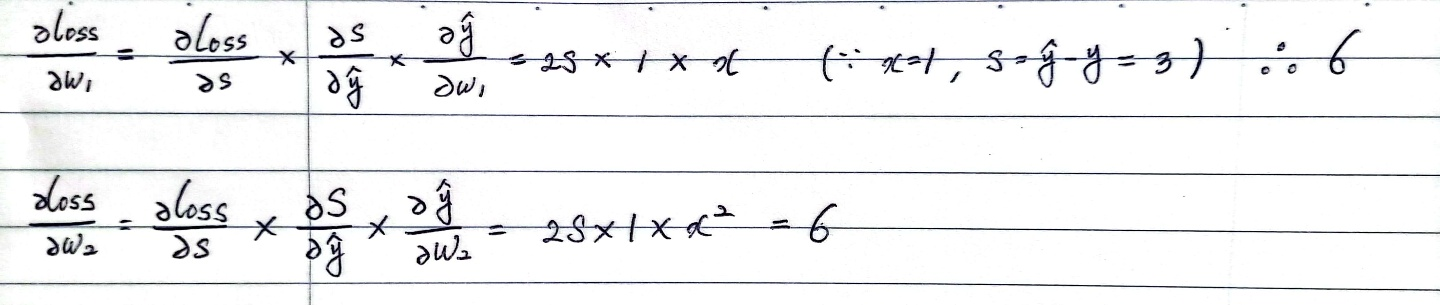

2) PyTorch의 Autograd를 이용해서 미분하시오 (이때 x = 1, y = 2, w1 = 1, w2 = 2, b = 2임)



In [82]:
import torch
x = 1
y = 2

w1 = torch.tensor([1.0], requires_grad = True)
w2 = torch.tensor([2.0], requires_grad = True)
b = torch.tensor([2.0])

def forward(x):
  return w2 * x**2 + x * w1 + b

def loss(x, y):
  y_hat = forward(x)
  return (y_hat - y) ** 2

l = loss(x, y)
l.backward()
print(w1.grad)
print(w2.grad)

tensor([6.])
tensor([6.])


5. [Exercise 5-1] Lecture 05, pp 11의 코드를 사용하여 아래 문제를 해결하시오.

1) 아래의 optimizer의 동작과 특성을 조사하시오

torch.optim.SGD
- data의 실제값과 model을 통한 예측값을 비교하여 loss를 도출한 후, loss를 줄이기 위하여 loss의 미분을 통하여 loss가 최소가 되는 지점을 찾는다.
- 전체 데이터의 일부인 batch데이터를 이용한다.

torch.optim.Adagrad
- 가중치가 업데이트된 횟수에 따라 learning rate를 다르게 업데이트 한다.
- 변동이 많이 있었던 가중치의 learning rate는 감소시키고, 변동이 많이 없었던 가중치에 대해서는 learning rate를 증가시켜서 학습한다.
- learning rate를 줄이기 때문에 최적의 해에 가까워 지기전에 learning rate가 0에 가까워져 더이상 최적화가 이루어지지 않을 수 있다.

torch.optim.RMSprop
- adagrad의 gradient가 0에 수렴하는 문제를 가지고 있기 때문에, adagrad의 문제점을 지수이동평균을 적용하여 개선한 방식이다. 학습의 최소 steo을 유지할 수 있다.

torch.optim.Adam
- momentum이란 이전 학습 결과도 가중치 변화에 영향을 주게 함으로써 최소값이 아닌 극소점을 만났을 때 빠져나올 수 있도록 해준다.
-Adam은 RMSprop와 Momentum을 조합한 방식

torch.optim.Adamax
- Adam의 계산식에서 v_t에 다른 norm을 넣어 사용하는 방법


torch.optim.ASGD
- 기존의 SGD방식에서 평균화 기법을 적용함으로써 더 높은 속도를 얻고자 고안된 방법

torch.optim.LBFGS
- LBFGS는 Limited-memory quasi-Newton methods의 한 예시로써, Hessian 행렬을 계산하거나 저장하기 위한 비용이 합리적이지 않을 경우 유용하게 사용된다. 이 방법은 밀도가 높은 의 Hessian 행렬을 저장하는 대신 차원의 벡터 몇 개만을 유지하여 Hessian 행렬을 추정(approximation)하는 방식이다.

torch.optim.Rprop
- back propagation과 비슷하지만 속도가 더 빠른 방식
- lr과 같은 하이퍼 파리미터가 필요하지 않으며, 각 가중치는 독립적으로 계산되며 최적화중 가중치의 부호가 바뀌었을 때는 -1<mu<0의 값을, 부호가 같을 때는 0<mu<1의 값을 곱해주면 최적화를 진행한다.


2) 아래의 optimizer를 사용해서 학습을 수행하고 그림을 통해 (x축: epoch, y축 loss) 수행 결과
를 비교하시오

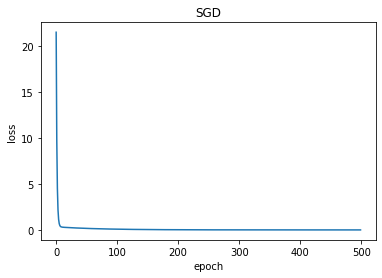

predict (after training) 4 tensor(7.9819)


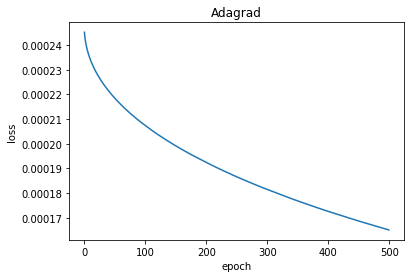

predict (after training) 4 tensor(7.9859)


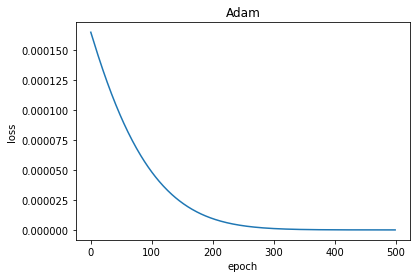

predict (after training) 4 tensor(7.9999)


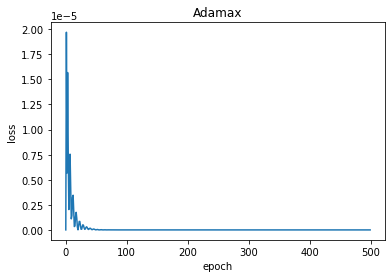

predict (after training) 4 tensor(8.)


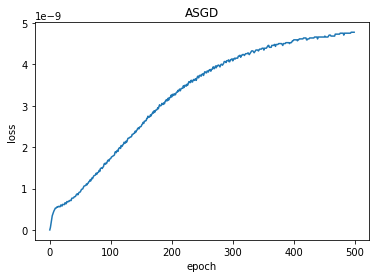

predict (after training) 4 tensor(7.9999)


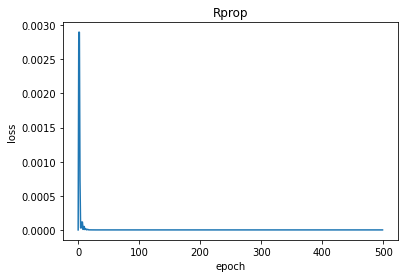

predict (after training) 4 tensor(8.0000)


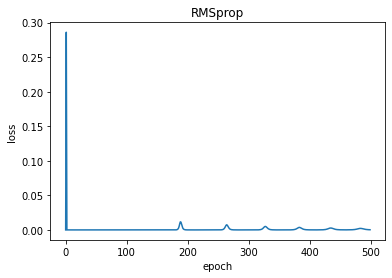

predict (after training) 4 tensor(7.9862)


In [83]:
from torch import nn, Tensor
from torch.autograd import Variable
import matplotlib.pyplot as plt

x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = nn.Linear(1,1)
  def forward(self,x):
    y_pred = self.linear(x)
    return y_pred

model = Model()
criterion = torch.nn.MSELoss(reduction = 'sum')
optim_list = [torch.optim.SGD(model.parameters(), lr = 0.01),
              torch.optim.Adagrad(model.parameters(), lr=0.0001, lr_decay=0, weight_decay=0),
              torch.optim.Adam(model.parameters(), lr = 0.0001),
              torch.optim.Adamax(model.parameters(), lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0),
              torch.optim.ASGD(model.parameters(), lr=0.01, lambd=0.0001, alpha=0.75, t0=1000000.0, weight_decay=0),
              torch.optim.Rprop(model.parameters(), lr=0.01, etas=(0.5, 1.2), step_sizes=(1e-06, 50)),
              torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
              ]
optim_name = ['SGD','Adagrad','Adam','Adamax','ASGD','Rprop','RMSprop']
for i in range(len(optim_list)):
  optimizer = optim_list[i]
  optimname = optim_name[i]
  epo = []
  loss_item = []

  for epoch in range(500):
   y_pred = model(x_data)
   loss = criterion(y_pred, y_data)
   epo.append(epoch)
   loss_item.append(loss.item())

   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

  plt.plot(epo, loss_item)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title(optimname)
  plt.show()
  hour_var = Variable(torch.Tensor([[4.0]]))
  print("predict (after training)", 4, model.forward(hour_var).data[0][0])

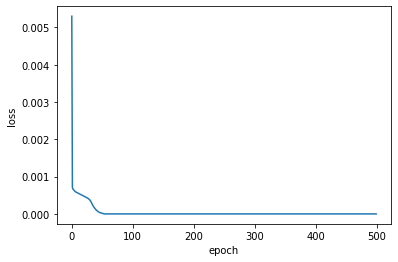

predict (after training) 4 tensor(8.0000)


In [47]:
optimizer = torch.optim.LBFGS(model.parameters(), lr=1, max_iter=20, max_eval=None, tolerance_grad=1e-05, tolerance_change=1e-09, history_size=100, line_search_fn=None)

epo = []
loss_item = []

for epoch in range(500):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  epo.append(epoch)
  loss_item.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  loss_fn = torch.nn.MSELoss(reduction='sum')
  for input, target in zip(x_data, y_data):
    def closure():
        optimizer.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        return loss
    optimizer.step(closure)

plt.plot(epo, loss_item)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
hour_var = Variable(torch.Tensor([[4.0]]))
print("predict (after training)", 4, model.forward(hour_var).data[0][0])

6. [Exercise 6-1] Lecture 06, pp 20의 코드를 사용하여 아래 문제를 해결하시오

1) 아래의 Activation function함수들에 대하여, 함수 형태, 함수의 미분 형태, 특성을 조사하시오

***** 보고서에 제출하였습니다 ******


2) PyTorch에서 제공하는 아래 Activation function 함수들을 Lecture 06, pp 20의 모델에 적용해서
성능을 비교하시오

In [84]:
from torch import sigmoid
import torch.optim as optim

activation_name = [sigmoid, nn.ReLU(), nn.ReLU6(), nn.Tanh(), nn.LeakyReLU(0.1), nn.PReLU(), nn.ELU(), nn.SELU(), nn.Threshold(0.1, 20), nn.Hardtanh(-2, 2)]
for i in range(len(activation_name)):
  x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0], [4.0]]))
  y_data = Variable(torch.Tensor([[0.], [0.], [1.], [1.]]))

  class Model(torch.nn.Module):
    def __init__(self):
      super(Model, self).__init__()
      self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
      y_pred = activation_name[i](self.linear(x))
      return y_pred

  model = Model()
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

  for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(activation_name[i])
  hour_var = Variable(torch.Tensor([[1.0]]))
  print("predict 1 hour ", 1.0, model(hour_var).data[0][0] > 0.5)
  hour_var = Variable(torch.Tensor([[7.0]]))
  print("predict 7 hours", 7.0, model(hour_var).data[0][0] > 0.5)
  print()

<built-in method sigmoid of type object at 0x7f271371d1a0>
predict 1 hour  1.0 tensor(True)
predict 7 hours 7.0 tensor(False)

ReLU()
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

ReLU6()
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(True)

Tanh()
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

LeakyReLU(negative_slope=0.1)
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

PReLU(num_parameters=1)
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

ELU(alpha=1.0)
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

SELU()
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(True)

Threshold(threshold=0.1, value=20)
predict 1 hour  1.0 tensor(True)
predict 7 hours 7.0 tensor(True)

Hardtanh(min_val=-2, max_val=2)
predict 1 hour  1.0 tensor(False)
predict 7 hours 7.0 tensor(False)

